# Used Car Price Prediction of Cardekho Data

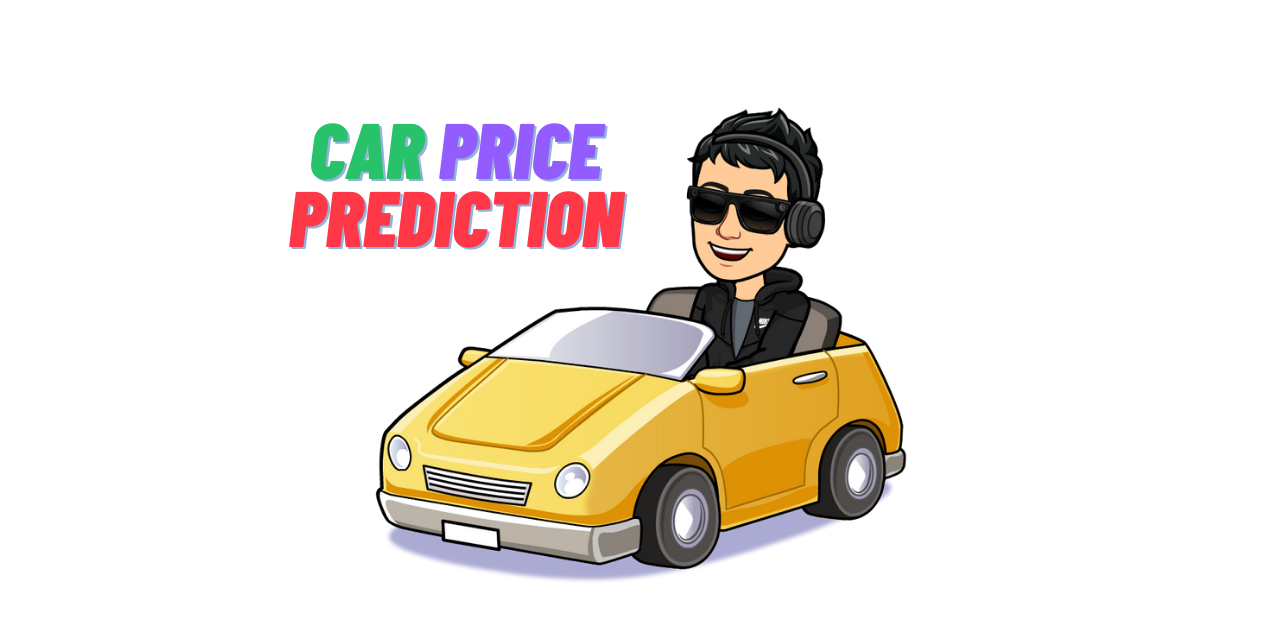

## Subject of contents:

A.) Understanding the Problem Statement<br>
B.) Data Collection<br>
C.) EDA (Exploratory Data Analysis)<br>
D.) Data Cleaning<br>
E.) Data Pre-Processing<br>
F.) Model Training<br>
G.) Choose Best Model<br>

### A.) Understanding the Problem Statement

1) The dataset comprises used cars sold on cardekho.com in India.<br> 
2) If user can predict the price of the car based on input features.<br>
3) Prediction results can be used to give new seller the price suggestion based on marketcondition.<br>

### B.) Data Collection

1) The dataset is collected from scrapping from cardekho website.<br> 
2) The data consists of 13 columns and 15411 rows.<br> 

In [133]:
# Importing data and required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [134]:
df = pd.read_csv("cardekho_dataset.csv")
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [135]:
# delete the unnamed columns

df.drop("Unnamed: 0", axis = 1, inplace=True)

In [136]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [137]:
# Shape of the dataset
df.shape

(15411, 13)

In [138]:
# All colum name
df.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

In [139]:
# Describe the data
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [141]:
df.duplicated().sum()

167

In [142]:
df.drop_duplicates(inplace = True)

In [143]:
df.duplicated().sum()

0

In [144]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [145]:
df.nunique()

car_name              121
brand                  32
model                 120
vehicle_age            24
km_driven            3688
seller_type             3
fuel_type               5
transmission_type       2
mileage               411
engine                110
max_power             342
seats                   8
selling_price        1086
dtype: int64

### Section B Report

1: There are 15411 rows and 12 columns in the dataset.<br>
2: There are no null values in the dataset.<br>
3: Out of 12 features 6 are numeric features (vehicle_age, km_driven, mileageengine, max_power, seats, selling_price) and rest are categorical features.<br>
4: There are 167 duplicate values total in the dataset.<br>

### C.) EDA (Exploratory Data Analysis)

In [146]:
# Show categories in column

print("Categories in 'seller_type' variable {}".format(df["seller_type"].unique()))
print("Categories in 'fuel_type' variable {}".format(df["fuel_type"].unique()))
print("Categories in 'transmission_type' variable {}".format(df["transmission_type"].unique()))
print("Categories in 'seats' variable {}".format(df["seats"].unique()))

Categories in 'seller_type' variable ['Individual' 'Dealer' 'Trustmark Dealer']
Categories in 'fuel_type' variable ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
Categories in 'transmission_type' variable ['Manual' 'Automatic']
Categories in 'seats' variable [5 8 7 6 4 2 9 0]


In [147]:
# Check Cars with 0 Seats

df[df['seats'] == 0]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
3217,Honda City,Honda,City,18,40000,Individual,Petrol,Manual,13.00,1493,100.00,0,115000
12619,Nissan Kicks,Nissan,Kicks,2,10000,Individual,Diesel,Manual,19.39,1461,108.49,0,1154000


In [148]:
# Numerical feature

num_feature = [feature for feature in df.columns if df[feature].dtype != 'O']

print("We have {} numerical feature:{}".format(len(num_feature),num_feature))

We have 7 numerical feature:['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']


In [149]:
# Categorical feature

cat_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

print("We have {} categorical feature:{}".format(len(cat_feature),cat_feature))

We have 6 categorical feature:['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


### Feature Information

1: car_name: Car's Full name, which includes brand and specific model name.<br>
2: brand: Brand Name of the particular car.<br>
3: model: Exact model name of the car of a particular brand.<br>
4: seller_type: Which Type of seller is selling the used car.<br>
5: fuel_type: Fuel used in the used car, which was put up on sale.<br>
6: transmission_type: Transmission used in the used car, which was put on sale.<br>
7: vehicle_age: The count of years since car was bought.<br>
8: mileage: It is the number of kilometer the car runs per litre.<br>
9: engine: It is the engine capacity in cc(cubic centimeters).<br>
10: max_power: Max power it produces in BHP.<br>
11: seats: Total number of seats in car.<br>
12: selling_price: The sale price which was put up on website.<br>
13: km_driven: Total no. of km driven from date of purchasing. 

In [150]:
# proportion of count data on categorical columns

for col in cat_feature:
    print(df[col].value_counts(normalize=True)*100)
    print("------------------------------------------")

Hyundai i20           5.890842
Maruti Swift Dzire    5.739963
Maruti Swift          5.077408
Maruti Alto           5.038048
Honda City            4.919969
                        ...   
Mercedes-AMG C        0.006560
Tata Altroz           0.006560
Ferrari GTC4Lusso     0.006560
Hyundai Aura          0.006560
Force Gurkha          0.006560
Name: car_name, Length: 121, dtype: float64
------------------------------------------
Maruti           32.360273
Hyundai          19.364996
Honda             9.682498
Mahindra          6.553398
Toyota            5.175807
Ford              5.090527
Volkswagen        4.027814
Renault           3.457098
BMW               2.860142
Tata              2.761742
Skoda             2.184466
Mercedes-Benz     2.177906
Audi              1.246392
Datsun            1.115193
Jaguar            0.380478
Land Rover        0.327998
Jeep              0.268958
Kia               0.209919
Porsche           0.137759
Volvo             0.131199
MG                0.124639
Mini 

### Univeriate Analysis

Taking one variable at a time and analyzing it.

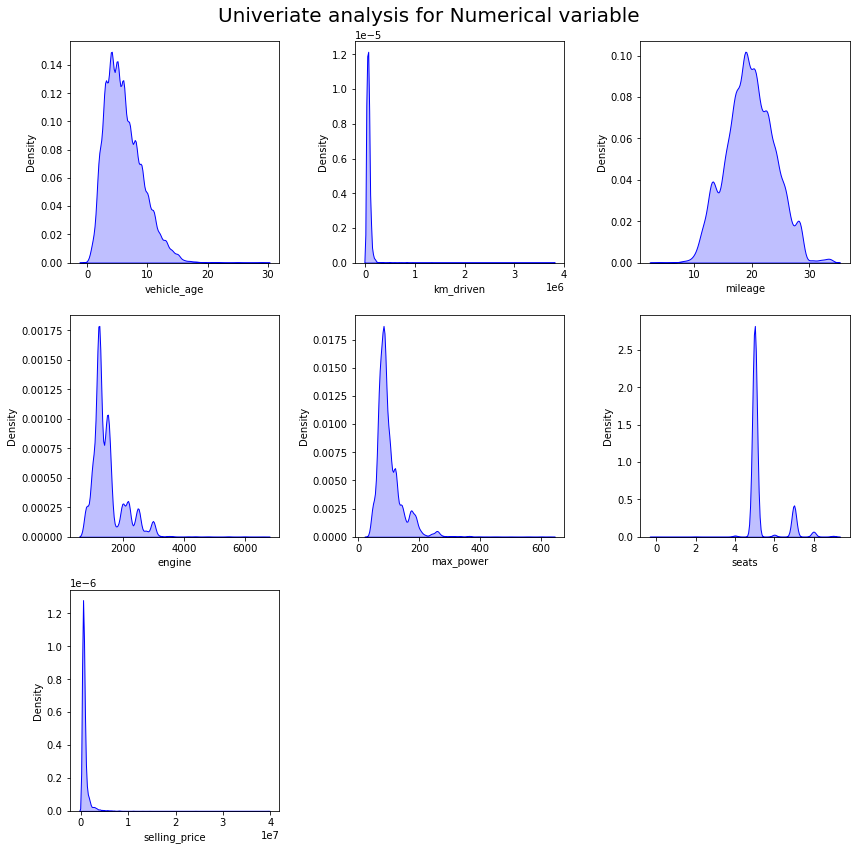

In [151]:
# Numerical Feature

plt.figure(figsize=(12,12))
plt.suptitle("Univeriate analysis for Numerical variable", fontsize = 20, fontweight = 20)

for i in range(0,len(num_feature)):
    plt.subplot(3,3, i+1)
    sns.kdeplot(x = df[num_feature[i]], shade = True, color = 'blue')
    plt.tight_layout()

**Report**<br>
1: Km_driven, max_power, selling_price, and engine are right skewed and postively skewed.<br>
2: Outliers in km_driven, enginer, selling_price, and max power.<br>

<AxesSubplot:xlabel='seats', ylabel='selling_price'>

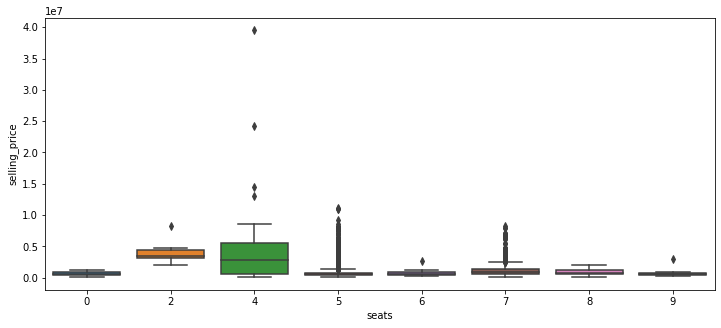

In [152]:
# Check outliers

plt.figure(figsize=(12,5))
sns.boxplot(x = df["seats"], y = df["selling_price"])

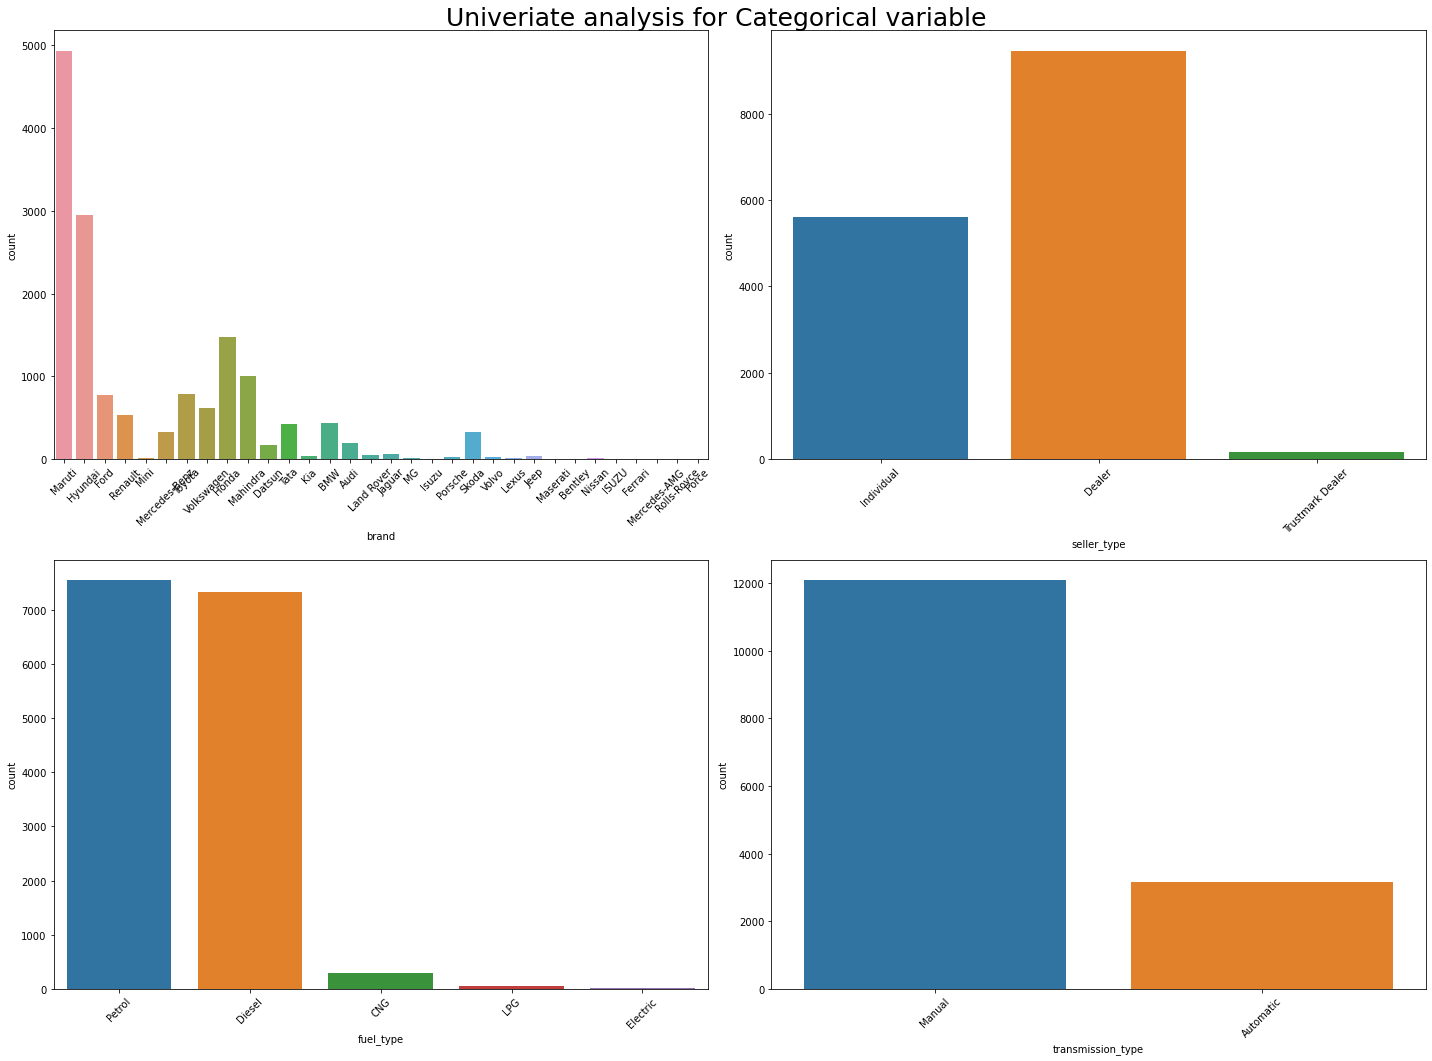

In [153]:
# Categorical Features

plt.figure(figsize=(20,15))
plt.suptitle("Univeriate analysis for Categorical variable", weight="bold", fontsize = 25, fontweight = 20)
cat1 = ['brand','seller_type','fuel_type','transmission_type']

for i in range(0,len(cat1)):
    plt.subplot(2,2, i+1)
    sns.countplot(x = df[cat1[i]])
    plt.xticks(rotation = 45)
    plt.tight_layout()

### Multivariate Analysis

In [154]:
# Check multicollinearity of Numerical Features

df[num_feature].corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.332725,-0.257599,0.098734,0.004356,0.030268,-0.241228
km_driven,0.332725,1.000000,-0.104979,0.192721,0.044776,0.192026,-0.079548
mileage,-0.257599,-0.104979,1.000000,-0.632161,-0.532172,-0.439943,-0.305128
engine,0.098734,0.192721,-0.632161,1.000000,0.807287,0.551401,0.585713
max_power,0.004356,0.044776,-0.532172,0.807287,1.000000,0.172264,0.751058
seats,0.030268,0.192026,-0.439943,0.551401,0.172264,1.000000,0.115299
selling_price,-0.241228,-0.079548,-0.305128,0.585713,0.751058,0.115299,1.000000


<AxesSubplot:>

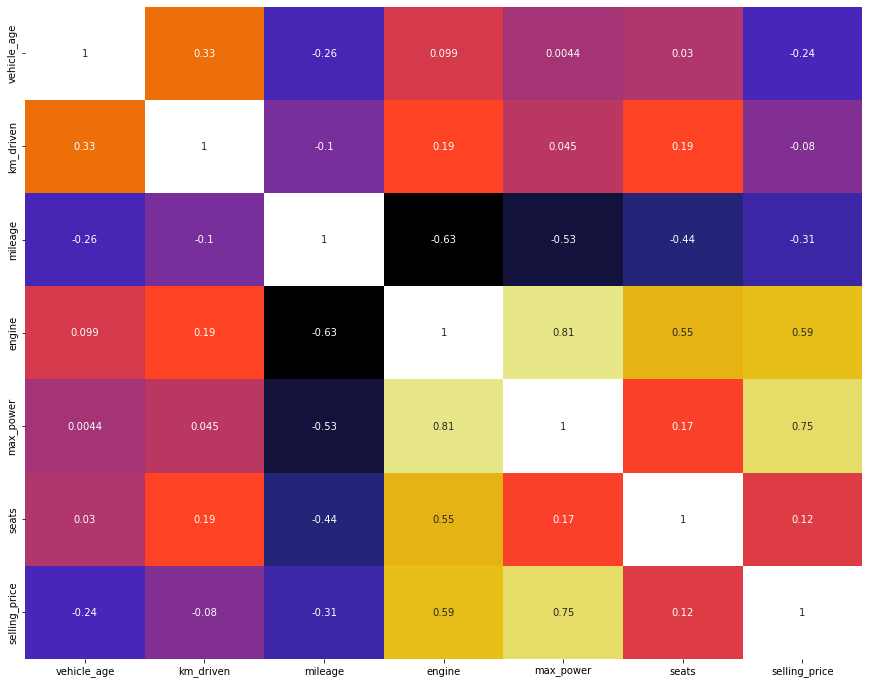

In [155]:
plt.figure(figsize=(15,12))
sns.heatmap(df[num_feature].corr(), annot= True, cbar=False, cmap = 'CMRmap')

### **Report**
1: Selling Price has Negative correlation with vehicle_age, km_driven, and mileage. i.e. If vehicle_age, km_driven, mileage increase then selling_price of the car will decreases.<br>
2: Selling_price has positive correlation with engine and max_power. It has a very weak postivecorrelation with seats.<br>

### Check Multicollinearity for Categorical Features

The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.
Here we test correlation of Categorical columns with Target column i.e Selling Price

In [156]:
### apply for 1 categorical feature

from scipy.stats import chi2_contingency
dataset_table = pd.crosstab(df["selling_price"], df["brand"])
dataset_table.head()

brand,Audi,BMW,Bentley,Datsun,Ferrari,Force,Ford,Honda,Hyundai,ISUZU,...,Mini,Nissan,Porsche,Renault,Rolls-Royce,Skoda,Tata,Toyota,Volkswagen,Volvo
selling_price,,,,,,,,,,,,,,,,,,,,,
40000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50000,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
55000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60000,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
chi2_contingency(dataset_table)

(123578.55779170697,
 0.0,
 33635,
 array([[0.01246392, 0.02860142, 0.0001968 , ..., 0.05175807, 0.04027814,
         0.00131199],
        [0.01246392, 0.02860142, 0.0001968 , ..., 0.05175807, 0.04027814,
         0.00131199],
        [0.03739176, 0.08580425, 0.0005904 , ..., 0.15527421, 0.12083443,
         0.00393597],
        ...,
        [0.01246392, 0.02860142, 0.0001968 , ..., 0.05175807, 0.04027814,
         0.00131199],
        [0.01246392, 0.02860142, 0.0001968 , ..., 0.05175807, 0.04027814,
         0.00131199],
        [0.01246392, 0.02860142, 0.0001968 , ..., 0.05175807, 0.04027814,
         0.00131199]]))

In [158]:
p_value =  chi2_contingency(pd.crosstab(df['selling_price'], df['brand']))[1]

In [159]:
p_value

0.0

In [160]:
# Applying chi-square test for all categorical variables

from scipy.stats import chi2_contingency
chi2_test = []

for feature in cat_feature:
    if chi2_contingency(pd.crosstab(df['selling_price'], df[feature]))[1]:
        chi2_test.append("Reject Null Hypothesis")
    else:
        chi2_test.append("Fail to reject the null hypothesis")
        
result = pd.DataFrame(data = [cat_feature, chi2_test]).T
result.columns = ['Feature', 'Hypothesis Results']
result

,Feature,Hypothesis Results
0,car_name,Fail to reject the null hypothesis
1,brand,Fail to reject the null hypothesis
2,model,Fail to reject the null hypothesis
3,seller_type,Reject Null Hypothesis
4,fuel_type,Fail to reject the null hypothesis
5,transmission_type,Fail to reject the null hypothesis


In [161]:
# Continuous feature
contiuous_feature = []
for feature in num_feature:
    if len(df[feature].unique()) >= 10:
        contiuous_feature.append(feature)
contiuous_feature

['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'selling_price']

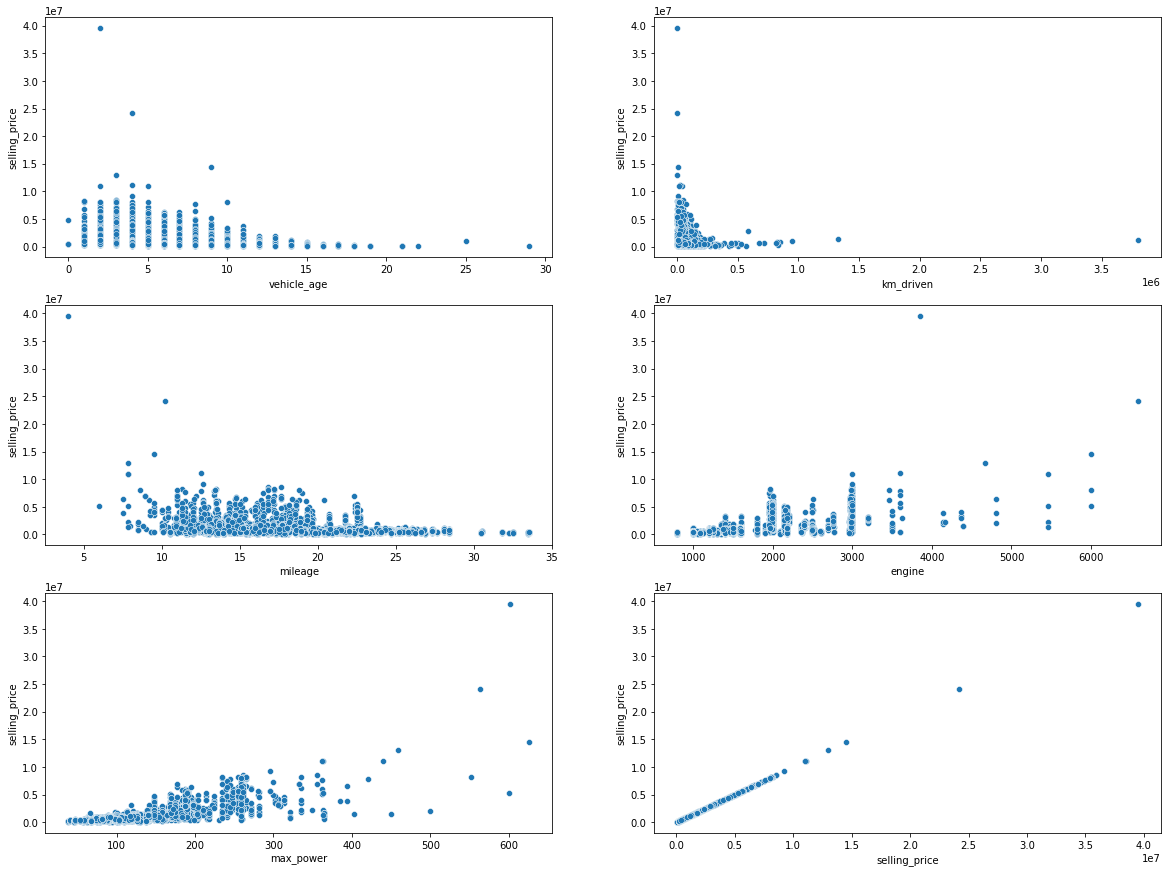

In [162]:
plt.figure(figsize=(20,15))

for i in range(0, len(contiuous_feature)):
    plt.subplot(3,2, i+1)
    sns.scatterplot(x = df[contiuous_feature[i]], y = df["selling_price"])

### **Report**
- Lower Vehicle age has more selling price than Vehicle with more age.
- Engine CC has positive effect on price.
- Kms Driven has negative effect on selling price.

In [163]:
### Visualization

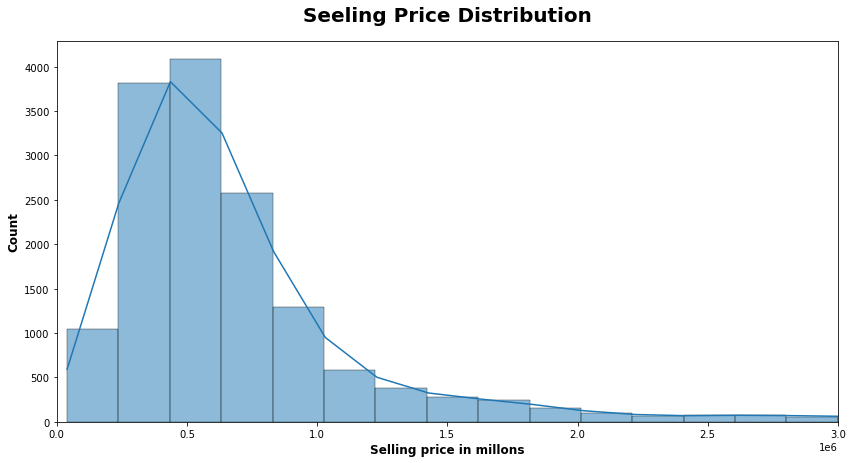

In [164]:
plt.figure(figsize = (14,7))
sns.histplot(df.selling_price, bins = 200, kde = True)
plt.title("Seeling Price Distribution", weight = 'bold', fontsize = 20, pad = 20)
plt.ylabel("Count", weight = 'bold', fontsize = 12)
plt.xlabel("Selling price in millons", weight = 'bold', fontsize = 12)
plt.xlim(0,3000000)
plt.show()

In [165]:
# Most selling cars
df.car_name.value_counts()[0:10]

Hyundai i20           898
Maruti Swift Dzire    875
Maruti Swift          774
Maruti Alto           768
Honda City            750
Maruti Wagon R        709
Hyundai Grand         569
Toyota Innova         544
Hyundai Verna         488
Hyundai i10           406
Name: car_name, dtype: int64

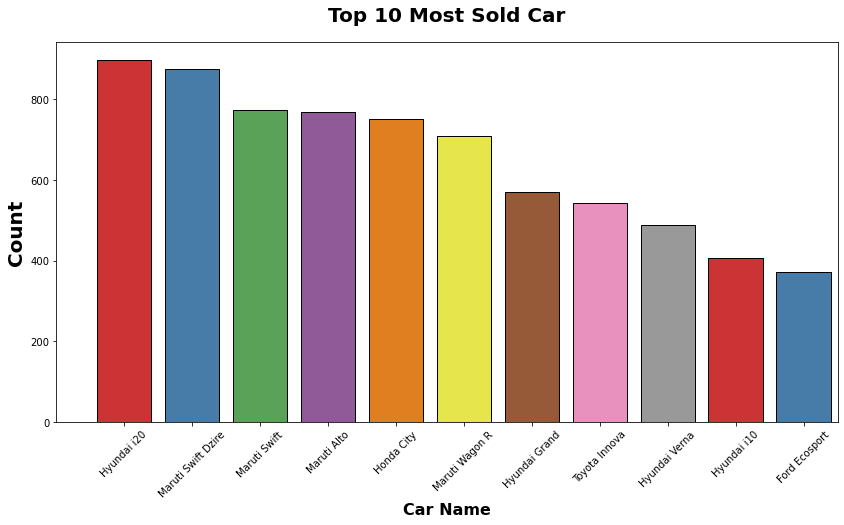

In [166]:
plt.subplots(figsize = (14,7))
sns.countplot(x = 'car_name', data = df, ec = 'black', palette= 'Set1', order = df['car_name'].value_counts().index)
plt.title("Top 10 Most Sold Car", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

In [167]:
# Check mean price of Hyundai i20 which is most sold

i20 = df[df['car_name']=='Hyundai i20']['selling_price'].mean()
print(f'The mean price of Hyundai i20 is {i20:.2f} Rupees')

The mean price of Hyundai i20 is 543195.99 Rupees


### **Report:**
- As per the Chart these are top 10 most selling cars.
- The total cars sold Hyundai i20 shares 5.8% of total ads posted and followed by Maruti SwiftDzire.
- Mean Price of Most Sold Car is 5.4 lakhs.
- This Feature has impact on the Target Variable.

In [168]:
# Most Selling Brands

df.brand.value_counts()[0:10]

Maruti        4933
Hyundai       2952
Honda         1476
Mahindra       999
Toyota         789
Ford           776
Volkswagen     614
Renault        527
BMW            436
Tata           421
Name: brand, dtype: int64

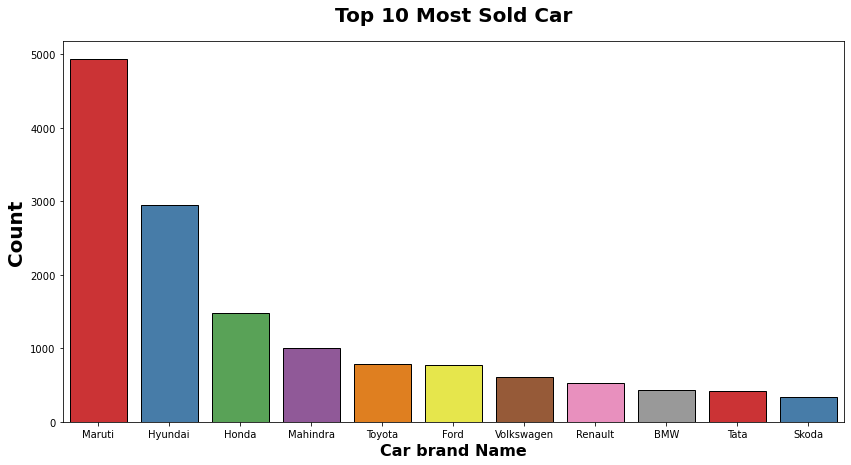

In [169]:
plt.subplots(figsize = (14,7))
sns.countplot(x = 'brand', data = df, ec = 'black', palette= 'Set1', order = df['brand'].value_counts().index)
plt.title("Top 10 Most Sold Car", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Car brand Name", weight="bold", fontsize=16)
plt.xlim(-0.5,10.5)
plt.show()

In [170]:
# Check the Mean price of Maruti brand which is most sold

maruti = df[df['brand']=='Maruti']['selling_price'].mean()
print(f'The mean price of Maruti is {maruti:.2f} Rupees')

The mean price of Maruti is 486985.38 Rupees


### **Report:**

- As per the chart, Maruti has the most share of Ads in used cars website and Maruti is the sold brand.
- Following Maruti we have Hyundai and Honda.
- Mean Price of Maruti Brand Cars is 4.87.

In [171]:
# Costliest Brand 

In [172]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [173]:
df.groupby('brand').selling_price.max()

brand
Audi              6800000
BMW               8500000
Bentley          14500000
Datsun             650000
Ferrari          39500000
Force              700000
Ford              3200000
Honda             3200000
Hyundai           2600000
ISUZU             1900000
Isuzu             2300000
Jaguar            6300000
Jeep              5600000
Kia               3525000
Land Rover        9200000
Lexus             8000000
MG                2075000
Mahindra          2950000
Maruti            1225000
Maserati          6200000
Mercedes-AMG      5100000
Mercedes-Benz    13000000
Mini              3875000
Nissan            1450000
Porsche          11100000
Renault           1155000
Rolls-Royce      24200000
Skoda             3550000
Tata              1750000
Toyota            3650000
Volkswagen        1250000
Volvo             8195000
Name: selling_price, dtype: int64

In [174]:
brand = df.groupby('brand').selling_price.max()
brand_df = brand.to_frame().sort_values('selling_price', ascending=False)[0:15]
brand_df

,selling_price
brand,
Ferrari,39500000
Rolls-Royce,24200000
Bentley,14500000
Mercedes-Benz,13000000
Porsche,11100000
Land Rover,9200000
BMW,8500000
Volvo,8195000
Lexus,8000000


In [175]:
brand_df.index

Index(['Ferrari', 'Rolls-Royce', 'Bentley', 'Mercedes-Benz', 'Porsche',
       'Land Rover', 'BMW', 'Volvo', 'Lexus', 'Audi', 'Jaguar', 'Maserati',
       'Jeep', 'Mercedes-AMG', 'Mini'],
      dtype='object', name='brand')

In [176]:
x = brand_df.values
x.flatten()

array([39500000, 24200000, 14500000, 13000000, 11100000,  9200000,
        8500000,  8195000,  8000000,  6800000,  6300000,  6200000,
        5600000,  5100000,  3875000], dtype=int64)

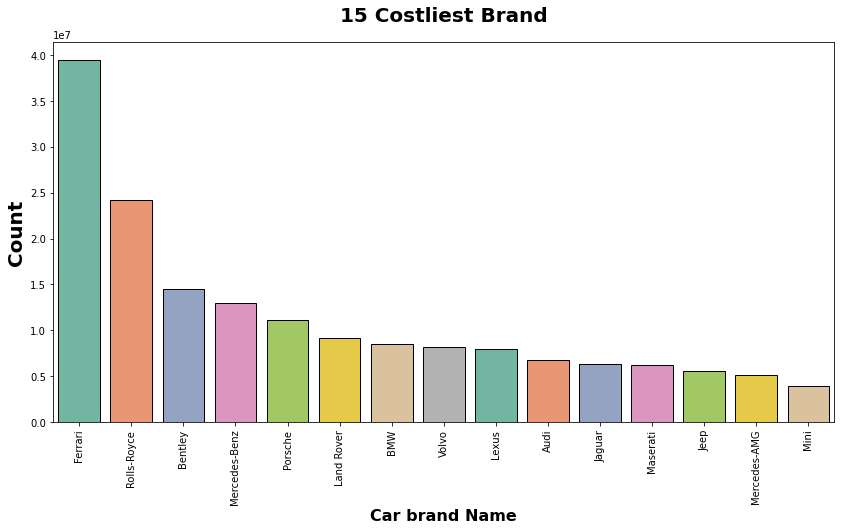

In [177]:
plt.subplots(figsize = (14,7))
sns.barplot(x = brand_df.index, y = brand_df.values.flatten(), palette= 'Set2', ec = 'black')
plt.title("15 Costliest Brand", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Car brand Name", weight="bold", fontsize=16)
plt.xticks(rotation = 90)
plt.show()

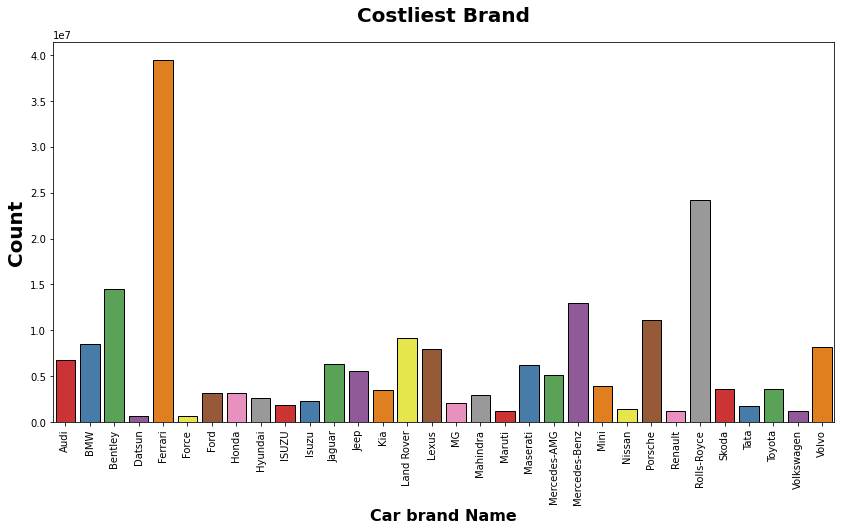

In [178]:
plt.subplots(figsize = (14,7))
sns.barplot(x = brand.index, y = brand.values, palette= 'Set1', ec = 'black')
plt.title("Costliest Brand", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Car brand Name", weight="bold", fontsize=16)
plt.xticks(rotation = 90)
plt.show()

### **Report:**

- Costiest Brand sold is Ferrari at 3.9 Cr.
- Following Ferrari Rolls-Royce which is sold on 2.42 Cr.
- Here we can conclude that Brand name creats an impact on selling price.

In [179]:
# Costliest Car

In [180]:
car = df.groupby('car_name').selling_price.max()
car_df = car.to_frame().sort_values('selling_price', ascending=False)[0:15]
car_df

,selling_price
car_name,
Ferrari GTC4Lusso,39500000
Rolls-Royce Ghost,24200000
Bentley Continental,14500000
Mercedes-Benz S-Class,13000000
Porsche Cayenne,11100000
Land Rover Rover,9200000
BMW 7,8500000
BMW Z4,8250000
Volvo XC,8195000


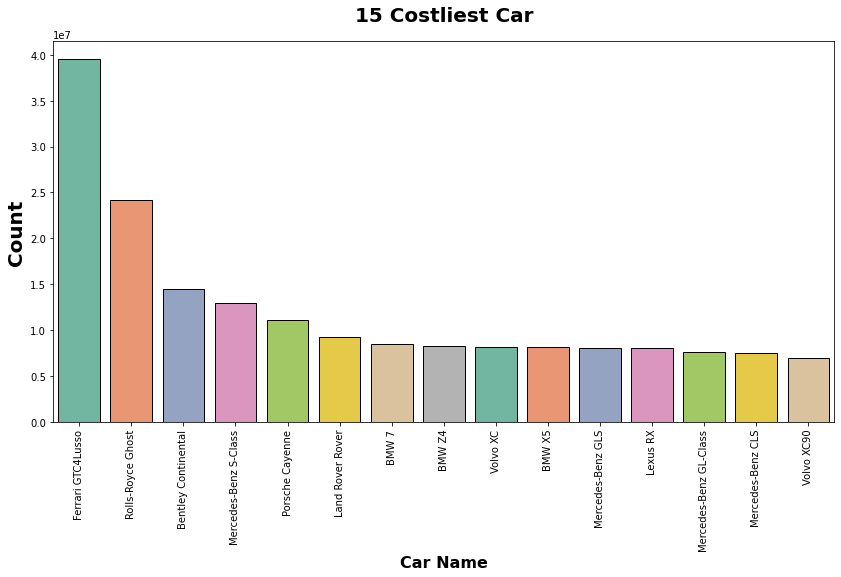

In [181]:
plt.subplots(figsize = (14,7))
sns.barplot(x = car_df.index, y = car_df.selling_price, palette= 'Set2', ec = 'black')
plt.title("15 Costliest Car", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation = 90)
plt.show()

### **Report:**

- Costiest Car sold is Ferrari GTC4Lusso at 3.9 Cr.
- Following Ferrari next is Rolls-Royce Ghost which is sold on 2.42 Cr.
- Other than Ferrari & Rolls-Royce other car has priced below 1.5cr.

In [182]:
# Most Mileage Brand and Car Name

In [183]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [184]:
# Most Mileage Brand

mileage = df.groupby('brand')['mileage'].mean().sort_values(ascending = False)[0:15]
mileage.to_frame()

,mileage
brand,
Maruti,22.425520
Renault,22.073586
Datsun,21.215647
Lexus,20.676667
Ford,19.970335
Honda,19.901463
Maserati,19.820000
Tata,19.780855
Hyundai,19.590650


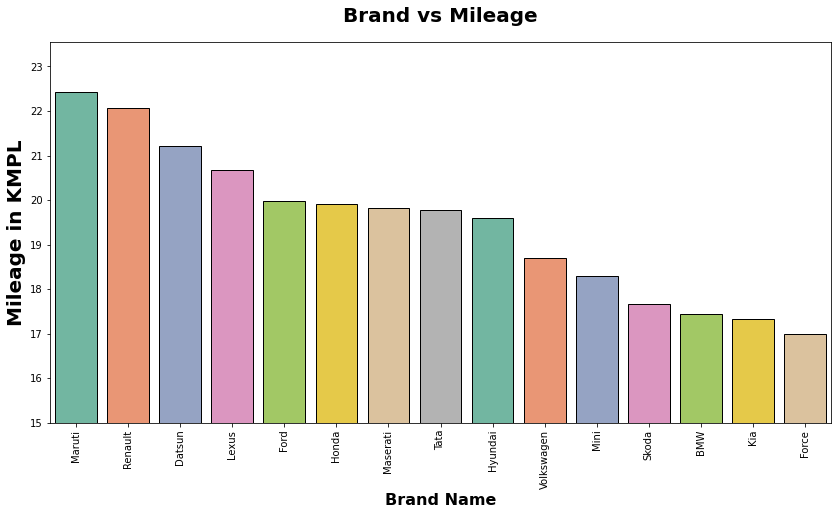

In [185]:
plt.subplots(figsize = (14,7))
sns.barplot(x = mileage.index, y = mileage.values, palette= 'Set2', ec = 'black')
plt.title("Brand vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in KMPL", weight="bold", fontsize=20)
plt.xlabel("Brand Name", weight="bold", fontsize=16)
plt.xticks(rotation = 90)
plt.ylim( bottom = 15)
plt.show()

In [186]:
# Most Mileage Car

mileage_car = df.groupby('car_name')['mileage'].mean().sort_values(ascending = False)[0:15]
mileage_car.to_frame()

,mileage
car_name,
Tata Tiago,24.617465
Maruti Ciaz,24.304198
Maruti Vitara,24.230519
Renault KWID,24.022308
Maruti Celerio,23.717521
Maruti Dzire VXI,23.512941
Maruti Dzire LXI,23.260000
Maruti Dzire ZXI,23.260000
Ford Aspire,23.025556


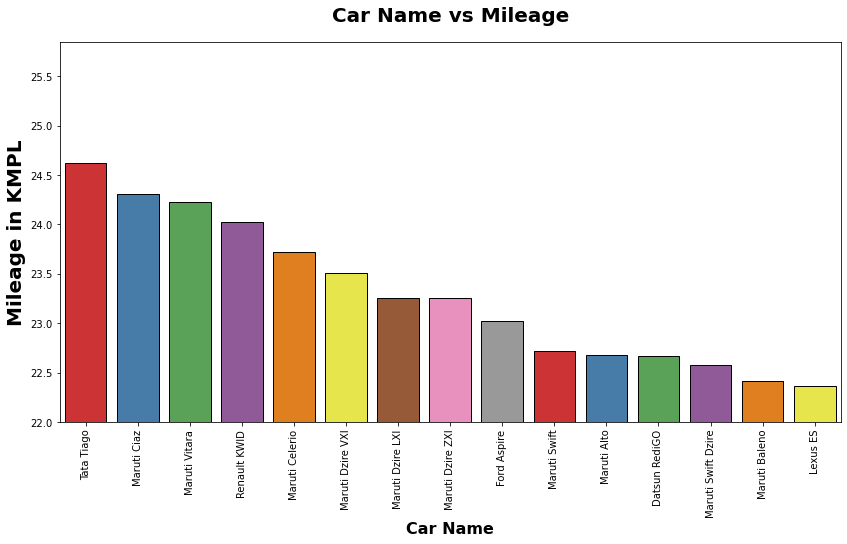

In [187]:
plt.subplots(figsize = (14,7))
sns.barplot(x = mileage_car.index, y = mileage_car.values, palette= 'Set1', ec = 'black')
plt.title("Car Name vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in KMPL", weight="bold", fontsize=20)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation = 90)
plt.ylim( bottom = 22)
plt.show()

In [188]:
# Kilometer driven vs Selling Price

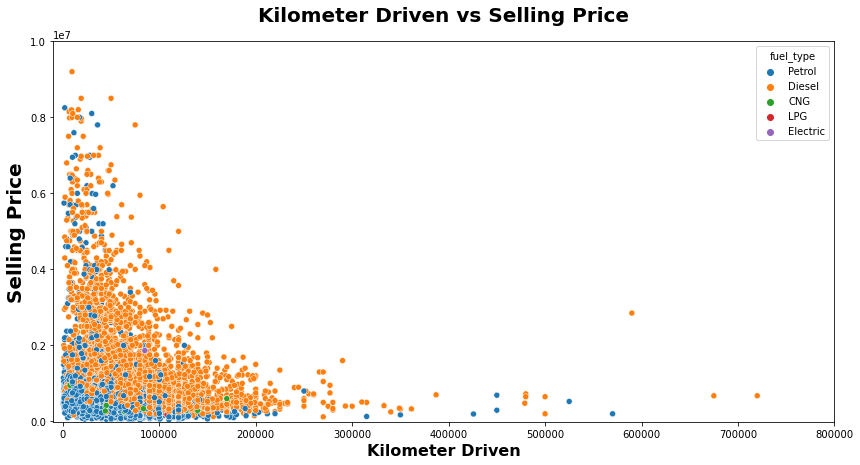

In [189]:
plt.subplots(figsize = (14,7))
sns.scatterplot(x = 'km_driven', y = 'selling_price', data = df, ec = 'white', color = 'b', hue = 'fuel_type')
plt.title("Kilometer Driven vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.xlabel("Kilometer Driven", weight="bold", fontsize=16)
plt.xlim(-10000, 800000) #Used for better visualization
plt.ylim(-10000, 10000000)
plt.show()

### **Report:**

- Many Cars were sold with kms between 0 to 20k Kilometers
- Low Kms driven cars had more selling price compared to cars which had more kms driven.

In [190]:
#Fuel Type Vs Selling Price

In [191]:
fuel = df.groupby('fuel_type')['selling_price'].median().sort_values(ascending = False)
fuel.to_frame()

,selling_price
fuel_type,
Electric,1857500.0
Diesel,700000.0
Petrol,460000.0
CNG,370000.0
LPG,182500.0


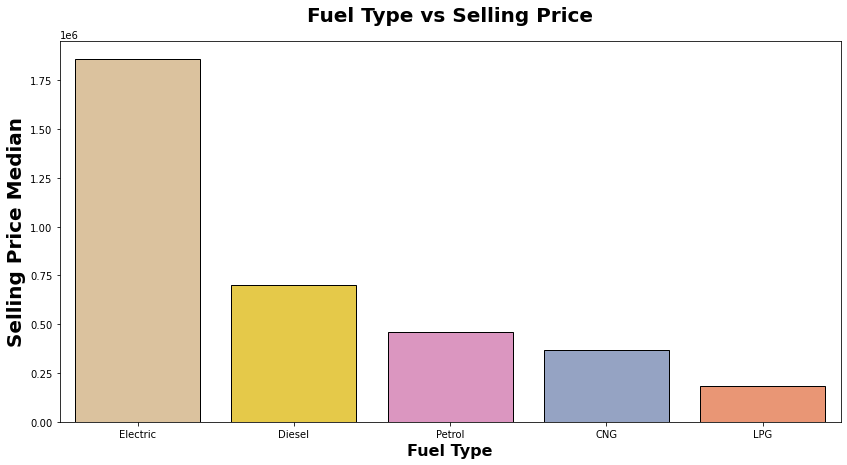

In [192]:
plt.subplots(figsize = (14,7))
sns.barplot(x = fuel.index, y = fuel.values, palette= 'Set2_r', ec = 'black')
plt.title("Fuel Type vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price Median", weight="bold", fontsize=20)
plt.xlabel("Fuel Type", weight="bold", fontsize=16)
plt.show()

### **Report:**

- Electric cars have highers selling average price.
- Followed by Diesel and Petrol.
- Fuel Type is also important feature for the Target variable.

In [193]:
# Most Sold Fuel Type

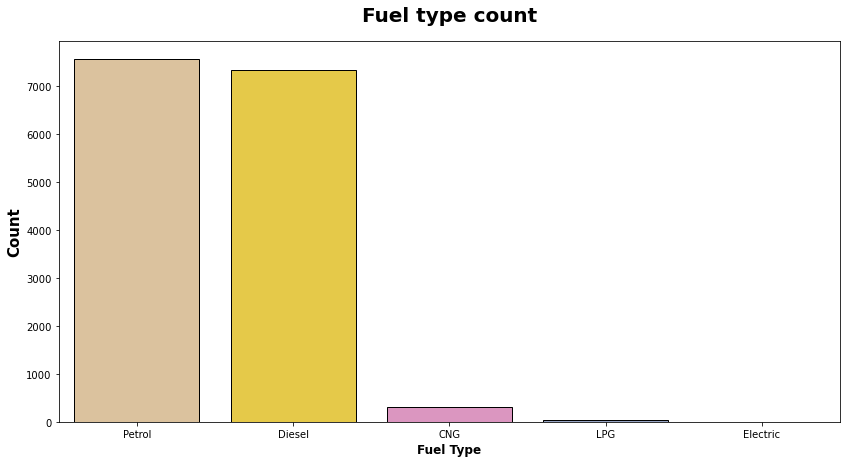

In [194]:
plt.subplots(figsize=(14,7))
sns.countplot(x=df.fuel_type, ec = "black", palette="Set2_r")
plt.title("Fuel type count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

### **Report:**

- Petrol and Diesel dominate the used car market in the website.
- The most sold fuel type Vechicle is Petrol.
- Followed by diesel and CNG and least sold is Electric.

In [195]:
# Fuel types available and mileage given

In [196]:
fuel_milage = df.groupby('fuel_type')['mileage'].mean().sort_values(ascending = False)
fuel_milage

fuel_type
CNG         25.824983
Diesel      20.056136
Electric    19.160000
Petrol      19.117257
LPG         17.836364
Name: mileage, dtype: float64

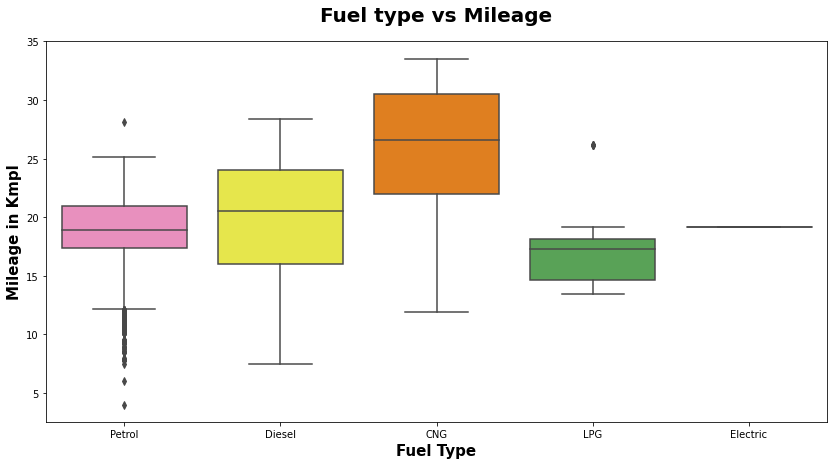

In [197]:
plt.figure(figsize=(14,7))
sns.boxplot(x = 'fuel_type', y = 'mileage', data = df, palette= 'Set1_r')
plt.title("Fuel type vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=15)
plt.show()

In [198]:
# Mileage vs Selling Price

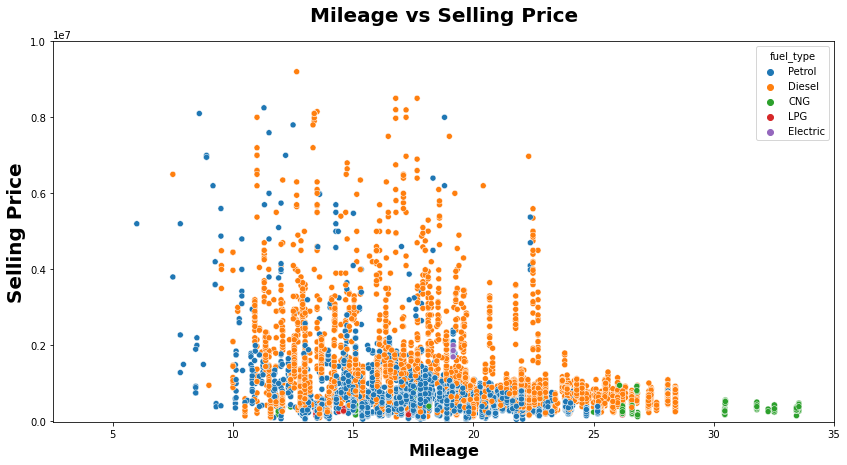

In [199]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="mileage", y='selling_price', data=df,ec = "white",color='b', hue='fuel_type')
plt.title("Mileage vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.xlabel("Mileage", weight="bold", fontsize=16)
plt.ylim(-10000,10000000)
plt.show()

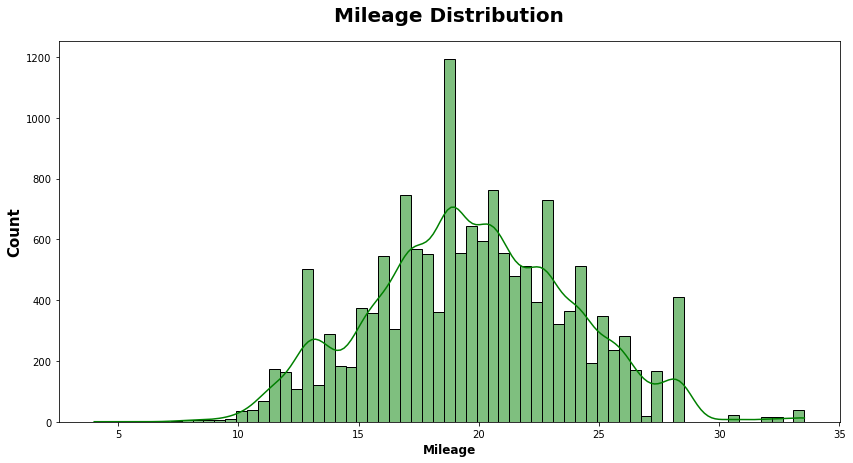

In [200]:
plt.subplots(figsize=(14,7))
sns.histplot(x=df.mileage, ec = "black", color='g', kde=True)
plt.title("Mileage Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Mileage", weight="bold", fontsize=12)
plt.show()

In [201]:
# Vehicle age vs Selling Price

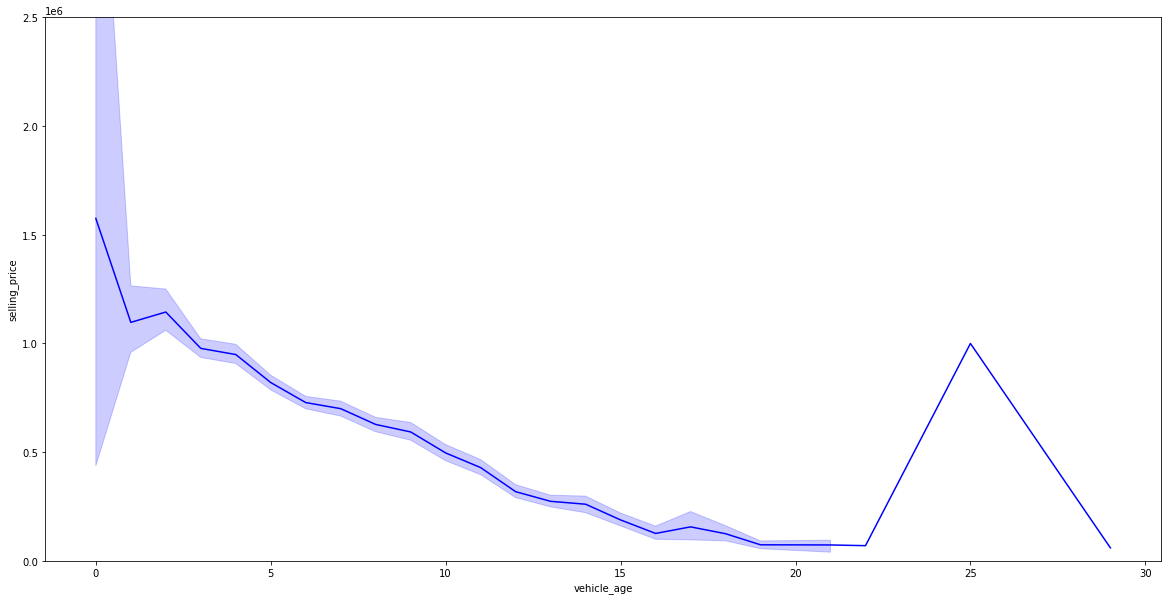

In [202]:
plt.subplots(figsize=(20,10))
sns.lineplot(x='vehicle_age',y='selling_price',data=df,color='b')
plt.ylim(0,2500000)
plt.show()

### **Report:**

- As the Vehicle age increases the price also get reduced.
- Vehicle age has Negative impact on selling price.

In [203]:
# Vehicle age vs Mileage

In [204]:
vehicle_age = df.groupby('vehicle_age')['mileage'].median().sort_values(ascending = False)
vehicle_age.to_frame().head(5)

,mileage
vehicle_age,
29,22.050
0,21.295
3,21.210
4,20.510
5,20.510


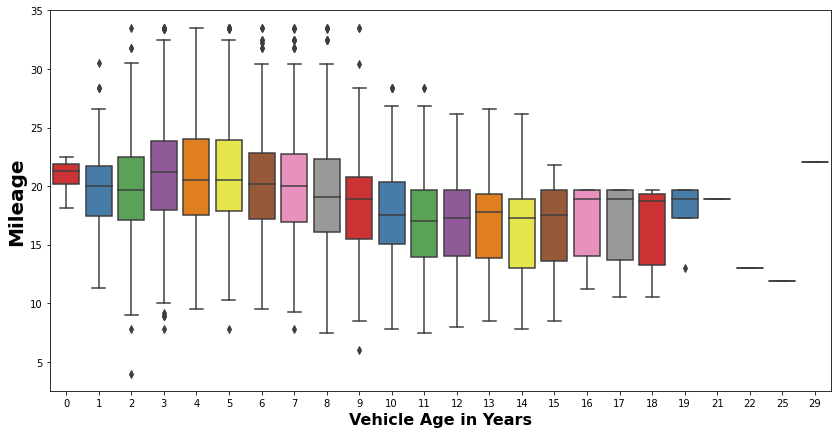

In [205]:
plt.subplots(figsize = (14,7))
sns.boxplot(x = df.vehicle_age, y = df.mileage, palette = 'Set1')
plt.ylabel("Mileage", weight="bold", fontsize=20)
plt.xlabel("Vehicle Age in Years", weight="bold", fontsize=16)
plt.show()

### **Report:**

- As the Age of vehicle increases the median of mileage drops.
- Newer Vehicles have more mileage median older vehicle.

In [206]:
# Oldest Car

In [207]:
oldest = df.groupby("car_name")['vehicle_age'].max().sort_values(ascending = False)
oldest.to_frame().head(10)

,vehicle_age
car_name,
Maruti Alto,29
BMW 3,25
Honda City,22
Maruti Wagon R,21
Mahindra Bolero,18
Mahindra Scorpio,18
Skoda Octavia,18
Honda CR-V,17
Mercedes-Benz E-Class,17


### **Report:**

- Maruti Alto is the Oldest car available 29 years old in the used car website followed by BMW 3 for 25 years old.

In [208]:
# Transmission Type

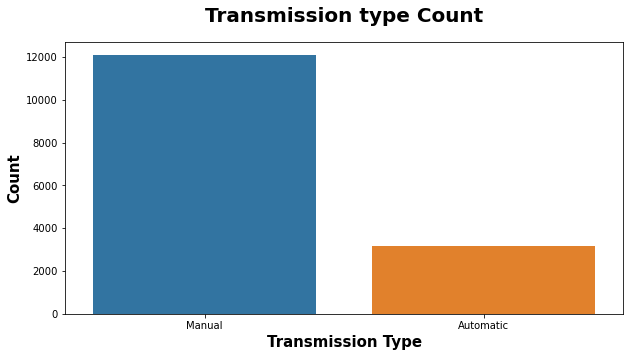

In [209]:
plt.subplots(figsize = (10,5))
sns.countplot(x = df.transmission_type, data = df)
plt.title("Transmission type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=15)
plt.show() 

In [210]:
# Transmission Type Vs Price

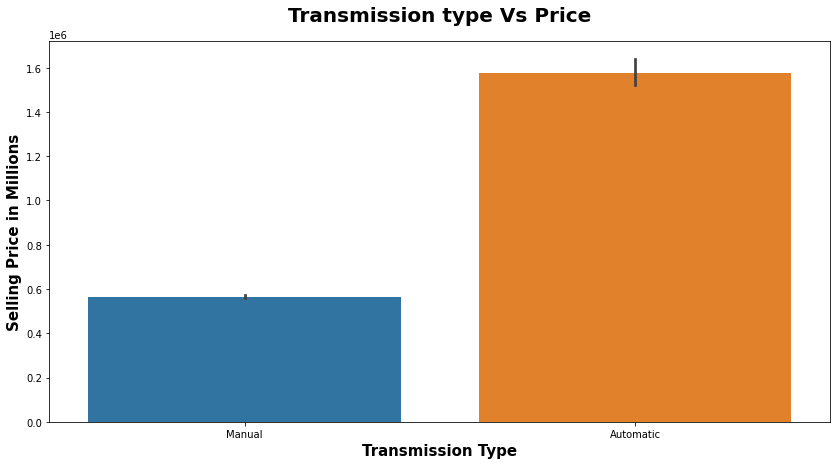

In [211]:
plt.subplots(figsize = (14,7))
sns.barplot(x = df.transmission_type, y = df.selling_price, data = df)
plt.title("Transmission type Vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=15)
plt.show() 

### **Report:**

- Manual Transmission was found in most of the cars which was sold.
- Automatic cars have more selling price than manual cars.

In [212]:
# Seller Type

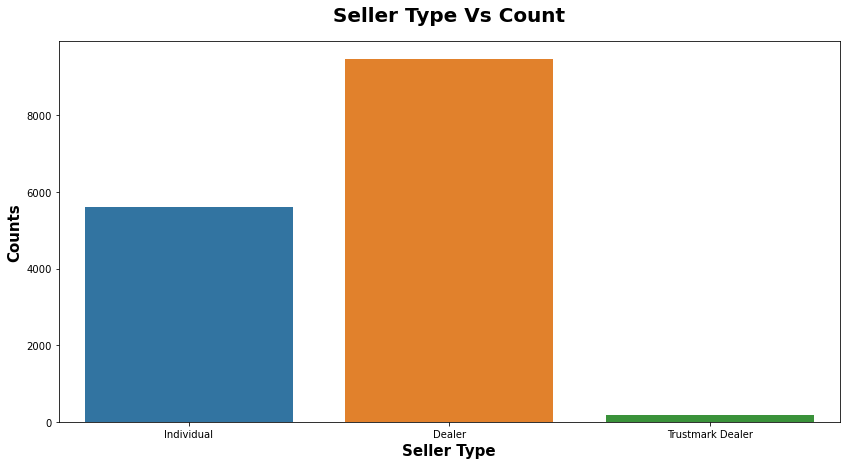

In [213]:
plt.subplots(figsize = (14,7))
sns.countplot(x = df.seller_type, data = df)
plt.title("Seller Type Vs Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Counts", weight="bold", fontsize=15)
plt.xlabel("Seller Type", weight="bold", fontsize=15)
plt.show()

In [214]:
dealer = df.groupby('seller_type')['selling_price'].median().sort_values(ascending=False)
dealer.to_frame()

,selling_price
seller_type,
Dealer,590000.0
Trustmark Dealer,540000.0
Individual,510000.0


### **Report:**

- Dealers have put more ads on used car website.
- Dealers have put 9539 ads with median selling price of 5.91 Lakhs.
- Followed by Individual with 5699 ads with median selling price of 5.4 Lakhs.
- Dealers have more median selling price than Individual.

### **Final Report:**

- The datatypes and Column names were right and there was 15244 rows and 13 columns
- The selling_price column is the target to predict. i.e Regression Problem.
- There are outliers in the km_driven, engine, selling_price, and max power.
- Dealers are the highest sellers of the used cars.
- Skewness is found in few of the columns will check it after handling outliers.
- Vehicle age has negative impact on the price.
- Manual cars are mostly sold and automatic has higher selling average than manual cars.
- Petrol is the most preffered choice of fuel in used car website, followed by diesel and LPG.
- We just need less data cleaning for this dataset.

#### Prepared by 
Pravas